<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/trial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup & Installation {display-mode: "code"}
!pip install pandas numpy matplotlib seaborn plotly scikit-learn dask statsmodels prophet xgboost torch torchvision torchaudio geopandas folium --quiet
import warnings
warnings.filterwarnings("ignore")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00


In [ ]:
# @title Load Dataset {display-mode: "code"}
url = "https://sandbox:/mnt/data//content/mechanical_timeseries_dataset (1).csv"  # Replace with your own path if uploading to Colab
df = pd.read_csv("/content/mechanical_timeseries_dataset (1).csv", parse_dates=["timestamp"])
df.head()


,timestamp,engine_temp_C,vibration_level_g,rotational_speed_rpm,pressure_psi,ambient_temp_C,component_wear_mm,location_lat,location_lon,anomaly_flag
0,2023-01-01 00:00:00,82.483571,0.144427,1496.025273,106.932176,29.851135,-0.056781,35.391170,-117.882741,0
1,2023-01-01 01:00:00,79.308678,0.212325,1478.547047,79.723227,22.688726,0.053570,35.408199,-117.976887,0
2,2023-01-01 02:00:00,83.238443,0.224911,1744.056579,91.139598,28.430085,0.033641,35.365397,-116.601722,0
3,2023-01-01 03:00:00,87.615149,0.257007,1284.664175,96.674206,25.554576,0.011338,34.785615,-117.441425,0
4,2023-01-01 04:00:00,78.829233,0.279027,1347.496152,107.031402,25.756585,0.102317,34.789707,-117.331842,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             2160 non-null   datetime64[ns]
 1   engine_temp_C         2160 non-null   float64       
 2   vibration_level_g     2160 non-null   float64       
 3   rotational_speed_rpm  2160 non-null   float64       
 4   pressure_psi          2160 non-null   float64       
 5   ambient_temp_C        2160 non-null   float64       
 6   component_wear_mm     2160 non-null   float64       
 7   location_lat          2160 non-null   float64       
 8   location_lon          2160 non-null   float64       
 9   anomaly_flag          2160 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 168.9 KB


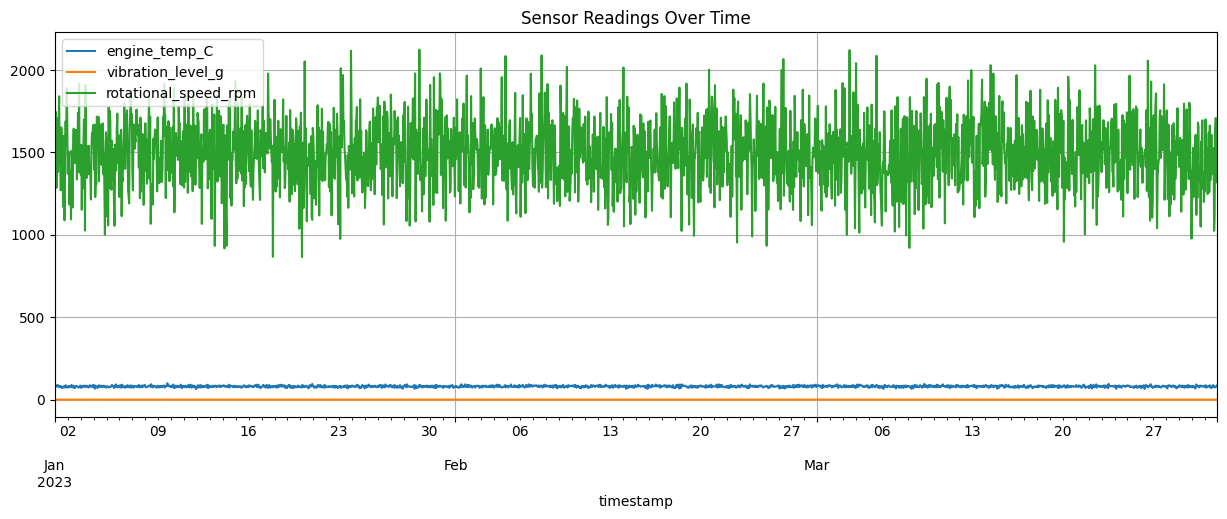

In [ ]:
# @title Exploratory Data Analysis (EDA) {display-mode: "code"}
df.describe()
df.info()

# Time plot
df.set_index("timestamp")[["engine_temp_C", "vibration_level_g", "rotational_speed_rpm"]].plot(figsize=(15, 5))
plt.title("Sensor Readings Over Time")
plt.grid()
plt.show()


In [ ]:
# @title Feature Engineering {display-mode: "code"}
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["rolling_temp"] = df["engine_temp_C"].rolling(24).mean()
df["rolling_vibration"] = df["vibration_level_g"].rolling(24).mean()
df.dropna(inplace=True)


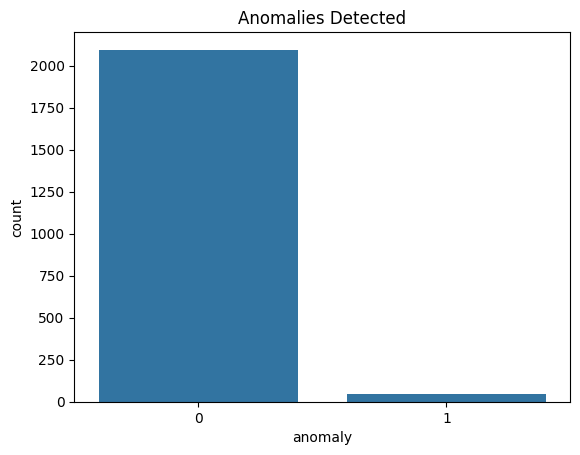

In [ ]:
# @title Anomaly Detection {display-mode: "code"}
features = ["engine_temp_C", "vibration_level_g", "rotational_speed_rpm"]
clf = IsolationForest(contamination=0.02)
df["anomaly"] = clf.fit_predict(df[features])
df["anomaly"] = df["anomaly"].map({1: 0, -1: 1})
sns.countplot(x="anomaly", data=df)
plt.title("Anomalies Detected")
plt.show()


In [ ]:
# @title Linear & Logistic Regression {display-mode: "code"}
X = df[["engine_temp_C", "vibration_level_g", "rotational_speed_rpm"]]  # Original feature set
y_reg = df["pressure_psi"]
y_clf = df["anomaly"]

# This line is causing the error because X has 2137 samples and y_reg has 1709 samples
# X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2)

# Update X to include all features including anomaly
X = df[["engine_temp_C", "vibration_level_g", "rotational_speed_rpm", "anomaly"]]

# Now split the data with the updated X
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2)

# Remove anomaly column from X_train and X_test, it should not be used in linear regression
X_train = X_train[["engine_temp_C", "vibration_level_g", "rotational_speed_rpm"]]
X_test = X_test[["engine_temp_C", "vibration_level_g", "rotational_speed_rpm"]]



reg = LinearRegression().fit(X_train, y_train)

# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test, reg.predict(X_test))
rmse = np.sqrt(mse)
print("Linear RMSE:", rmse)


# You should also split the data for the logistic regression to avoid data leakage
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    df[["engine_temp_C", "vibration_level_g", "rotational_speed_rpm"]], df["anomaly"], test_size=0.2
)

clf = LogisticRegression().fit(X_train_clf, y_train_clf)
print("Logistic Accuracy:", clf.score(X_test_clf, y_test_clf))

Linear RMSE: 9.690754284139631
Logistic Accuracy: 0.9836448598130841


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjx_pv_w/z8ji1dmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsjx_pv_w/vwet6fcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87638', 'data', 'file=/tmp/tmpsjx_pv_w/z8ji1dmj.json', 'init=/tmp/tmpsjx_pv_w/vwet6fcr.json', 'output', 'file=/tmp/tmpsjx_pv_w/prophet_model05kc_uo0/prophet_model-20250430151436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result,

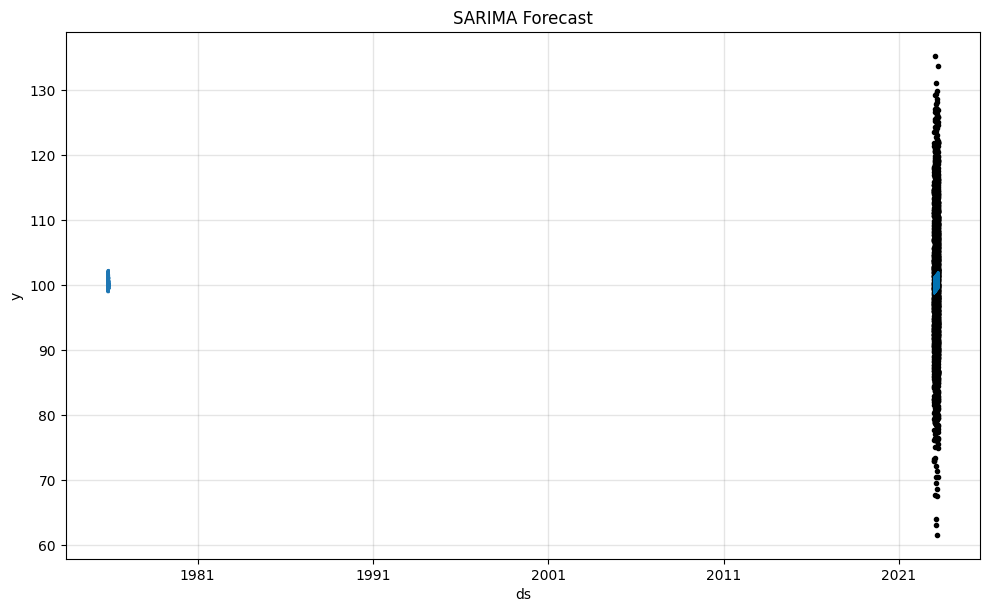

In [ ]:
# @title Prophet & SARIMA {display-mode: "code"}
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prophet
prophet_df = df[["timestamp", "pressure_psi"]].rename(columns={"timestamp": "ds", "pressure_psi": "y"})
m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(periods=48, freq="H")
forecast = m.predict(future)
m.plot(forecast)

# SARIMA
sarima_model = SARIMAX(df["pressure_psi"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=48)
plt.plot(sarima_forecast)
plt.title("SARIMA Forecast")
plt.show()


In [ ]:
# @title CNN, RNN, LSTM, Transformer {display-mode: "code"}
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Dummy dataset
series = df["engine_temp_C"].values[-1000:]
X = []
y = []
for i in range(50, len(series)):
    X.append(series[i - 50:i])
    y.append(series[i])
X = np.array(X)
y = np.array(y)

X_tensor = torch.tensor(X).float().unsqueeze(1)
y_tensor = torch.tensor(y).float().unsqueeze(1)
loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=32)


# Simple LSTM Model
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=50, hidden_size=64, batch_first=True)  # Create LSTM instance
        self.linear = nn.Linear(64, 1)  # Create Linear instance

    def forward(self, x):
        out, _ = self.lstm(x)  # Use the LSTM instance
        return self.linear(out[:, -1, :])  # Use the Linear instance


model = LSTMModel()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train 1 epoch
for xb, yb in loader:
    pred = model(xb)
    loss = loss_fn(pred, yb)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
print("Sample LSTM trained (1 epoch)")

Sample LSTM trained (1 epoch)


In [ ]:
# @title Dask Example {display-mode: "code"}
import dask.dataframe as dd
ddf = dd.from_pandas(df, npartitions=4)
ddf.groupby("day")["engine_temp_C"].mean().compute()


,engine_temp_C
day,
1,80.437902
2,80.211144
3,80.156377
4,80.782148
5,80.356362
6,80.313159
7,80.716433
8,79.828909
9,81.013950


In [ ]:
# @title Geospatial Analysis {display-mode: "code"}
import folium
map_center = [df["location_lat"].mean(), df["location_lon"].mean()]
m = folium.Map(location=map_center, zoom_start=7)

for _, row in df.sample(200).iterrows():
    folium.CircleMarker([row["location_lat"], row["location_lon"]],
                        radius=2, color="red").add_to(m)
m
